# First analysis
05 Jan. 2021

- Open ROOT files
- Compute variables of variables such as means, standard deviations, min, max,... of the digitizer outputs
- Plots the distributions

## Libraries

In [1]:
from project import defs, files


import lib.rootdata as lrd
import lib.plot as lp

import matplotlib.pyplot as plt

## Open ROOT file

In [1]:
run = "00405127"
num = "0644" # id of the file for the given run

# Eta and layer to keep
# eta = 0.05
# layer = 0
eta = None
layer = 2

In [1]:
file_path = files.get_path_run_num(run=run, num=num)

# Given {rapidity} and given {layer}
dataframe = lrd.load_ROOT_into_dataframe(
    file_path, 
    tree_name=defs.unproc_tree_name,
    variables=defs.unproc_kept_variables,
    cut=files.get_cut(eta=eta, layer=layer),
)

NameError: name 'files' is not defined

### Processing

In [6]:
dataframe = files.process_dataframe(dataframe)

Remove NaN events
5196 events removed out of 5819520 -> efficiency 0.0008928571428571428
Time taken: 30.76263999938965


## Compute variables of interest

### Time comparison 
This was used to find the best way to compute the variables of interest (voi).

In [7]:
# Nsamples = 32
# samples = dataframe[defs.list_samples_columns]
# samples.columns = list(range(Nsamples)) # samples[i] -> i

# # int32 to host samples_array**2 for the computation of the std
# samples_array = np.asarray(samples, dtype='int32') 

In [8]:
# # Pedestal
# pedestal = samples[0]

# print("Computation mean with pandas", '='*10)
# %time mean = samples.mean(axis=1)
# print("Computation mean with numpy")
# %time mean = np.mean(samples_array, axis=1)


# print("Computation std by hand", '='*10)
# %time std = np.sqrt(np.mean(np.square(samples_array), axis=1) - mean**2) 
# print(std)
# print("Computation std with pandas")
# %time std = samples.std(axis=1)
# print(std)

# print("Computation std with numpy")
# %time std = np.std(np.asarray(samples), axis=1)
# print(std)

# print("Computation maxi with pandas", '='*10)
# %time maxi = samples.max(axis=1)
# print(maxi)
# print("Computation maxi with numpy")
# %time maxi = np.max(samples_array, axis=1)
# print(maxi)

# print("Computation mini with pandas", '='*10)
# %time mini = samples.min(axis=1)
# print(mini)
# print("Computation mini with numpy")
# %time mini= np.min(samples_array, axis=1)
# print(mini)


# print("Computation median with pandas", '='*10)
# %time median = samples.median(axis=1)
# print(median)

# print("Computation median with numpy")
# %time median = np.median(samples_array, axis=1)
# print(median)


# print("Computation pos_maxi", '='*10)
# %time pos_maxi = np.argmax(samples_array, axis=1)

# print("Computation pos_mini", '='*10)
# %time pos_mini = np.argmin(samples_array, axis=1)

### Optimal computation

In [9]:
# %%time

# # Computation of the mean with pandas (pandas is as fast as numpy)
# samples['mean'] = samples.mean(axis=1)

# # Computation of the std by hand (using numpy functions) is far faster
# # Probably because we don't need to recompute the mean
# samples['std'] = np.sqrt(np.mean(np.square(samples_array), axis=1) - samples['mean']**2) 

# # Computation of the max and min in numpy and pandas have equal time performance
# samples['maxi'] = samples.max(axis=1)
# samples['mini'] = samples.min(axis=1)

# # Computation of the median far faster with numpy (/4)
# samples['median'] = np.median(samples_array, axis=1)

# # Computation of the index of min and max undeniably faster with numpy (/10)
# samples['pos_maxi'] = np.argmax(samples_array, axis=1)
# samples['pos_mini'] = np.argmin(samples_array, axis=1)

In [10]:
dataframe = files.compute_voi(
    dataframe=dataframe
)

Time taken: 11.151349067687988


## Plot variables of interest 

In [12]:
path = f"run_{run}_num_{num}"
path +=f"_eta_{eta}_layer_{layer}"

Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0785_eta_0.05_layer_0/std.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0785_eta_0.05_layer_0/std.pdf


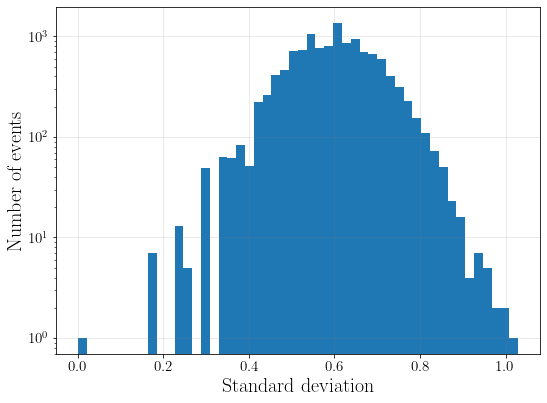

In [10]:
fig, ax = lp.plot_hist(dataframe['std'], 'Standard deviation', logscale=True)
lp.save_fig(fig, path=path, name="std")

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(8*3, 6))
lp.plot_hist(dataframe['mean'], 'Mean', axes[0], logscale=True, bins=100)
lp.plot_hist(dataframe['std'], 'Standard deviation', axes[1], logscale=True)
lp.plot_hist(dataframe['pedestal'], 'Pedestal', axes[2], logscale=True)

lp.save_fig(fig, name="mean_std_pedestal", path=path)

Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0785_eta_0.05_layer_0/mean_std_pedestal.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0785_eta_0.05_layer_0/mean_std_pedestal.pdf


In [13]:
fig, _ = lp.plot_hist(dataframe['median'], 'Median', logscale=True)
lp.save_fig(fig, name="median", path=path)

Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0785_eta_0.05_layer_0/median.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0785_eta_0.05_layer_0/median.pdf


Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0785_eta_0.05_layer_0/mean-pedestal.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0785_eta_0.05_layer_0/mean-pedestal.pdf


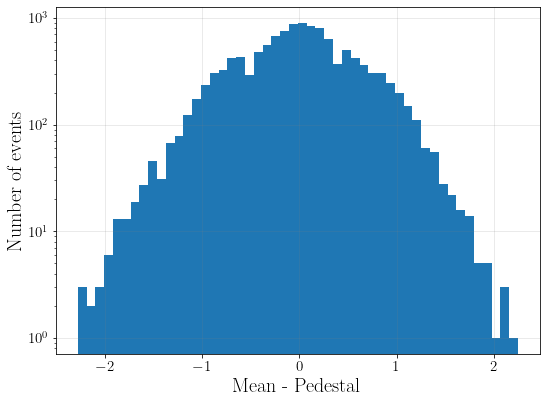

In [14]:
fig, _ = lp.plot_hist(dataframe['mean'] - dataframe['pedestal'], 'Mean - Pedestal', logscale=True)
lp.save_fig(fig, name="mean-pedestal", path=path)

In [15]:
lp.plot_hist2d(
    dataframe['mean'], dataframe['std'],
    "Mean", "Standard deviation",
    logscale=True,
)
# plot_hist2d(
#     mean, std,
#     "Mean", "Standard deviation",
#     logscale=True,
#     min_max=[
#         [mean.min(), mean.max()],
#         [0., 3.]
#     ]
# )

(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot:xlabel='Mean', ylabel='Standard deviation'>)

(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot:xlabel='mean', ylabel='mean - pedestal'>)

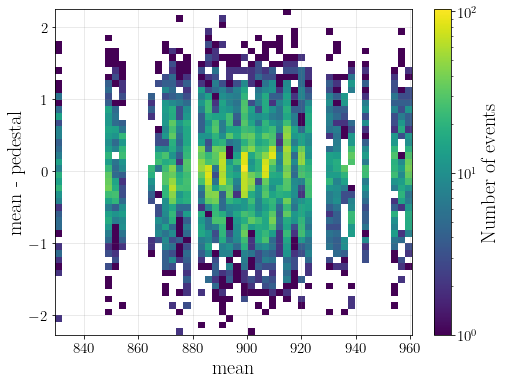

In [16]:
lp.plot_hist2d(
    dataframe['mean'], dataframe['mean'] - dataframe['pedestal'],
    'mean', 'mean - pedestal',
    logscale=True,
)

lp.plot_hist2d(
    dataframe['mean'], dataframe['mean'] - dataframe['pedestal'],
    'mean', 'mean - pedestal',
    logscale=True,
)

# plot_hist2d(
#     mean, mean - pedestal,
#     "Mean", "Mean - Pedestal",
#     logscale=True,
#     min_max=[
#         [mean.min(), mean.max()],
#         [-10., 10.]
#     ]
# )

(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot:xlabel='max - min', ylabel='Standard deviation'>)

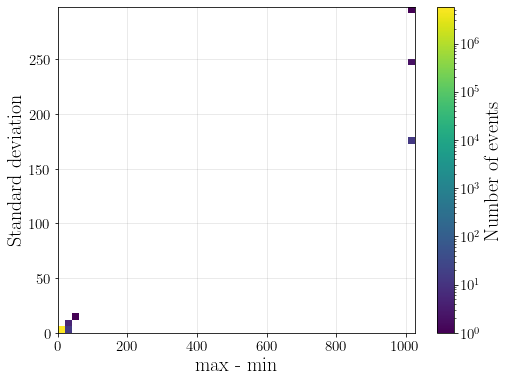

In [13]:
lp.plot_hist2d(
    dataframe['max'] - dataframe['min'], dataframe['std'],
    'max - min', 'Standard deviation',
    logscale=True,
)

## Find a signal event

Create the folders in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0644_eta_None_layer_2
Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0644_eta_None_layer_2/mean-pedestal.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0644_eta_None_layer_2/mean-pedestal.pdf


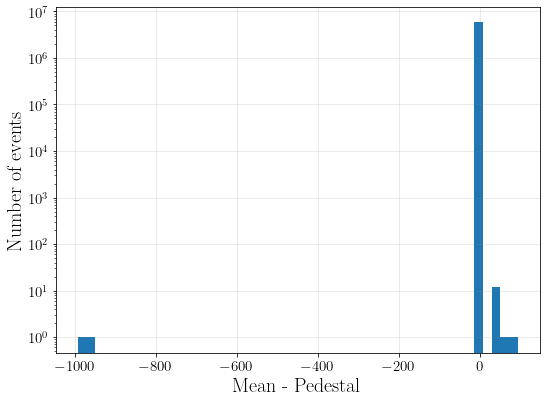

In [14]:
fig, ax = lp.plot_hist(dataframe['mean'] - dataframe['pedestal'], 'Mean - Pedestal', logscale=True)
lp.save_fig(fig, path=path, name="mean-pedestal")

In [24]:
fig, ax = lp.plot_hist(dataframe['std'], 'std', logscale=True)
lp.save_fig(fig, path=path, name="std")

Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0644_eta_None_layer_2/std.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0644_eta_None_layer_2/std.pdf


In [25]:
# Sélectionne des évènements pour lesquels mean = pedestal
dataframe_signal = dataframe.query("abs(mean - pedestal) < 10")
fig, ax = lp.plot_hist(dataframe_signal['std'], 'std', logscale=True)


In [26]:
dataframe_signal = dataframe_signal.query("(std > 4)")


In [27]:
dataframe_signal

channelId  layer     eta       phi  ieta  iphi  region     s0     s1  \
100299   979457024      2 -1.7125  0.249528    11     2       1  506.0  506.0   
128308   985222656      2 -1.6875 -2.401191    10    39       1  422.0  423.0   
194633   977363968      2 -1.7625  1.034926    13    10       1  498.0  498.0   
249119   985747968      2 -1.7125 -2.990240    11    33       1  521.0  520.0   
320589   974229504      2 -1.5625  2.409372     5    24       1  446.0  447.0   
509290   984184320      2 -1.5375 -2.008492     4    43       1  402.0  401.0   
532303   979981824      2 -1.7125 -0.044997    11    63       1  503.0  502.0   
696654   974218240      2 -1.5375  1.820324     4    18       1  379.0  379.0   
757999   997330432      2  2.2875 -2.409372    34    39       1  204.0  204.0   
838639   997330432      2  2.2875 -2.409372    34    39       1  195.0  195.0   
1099985  974228480      2 -1.5625  2.213023     5    22       1  450.0  451.0   
1176757  983647744      2 -1.6625 -2.008492     9    43       1  445.0  445.0   
1194466  984180224      2 -1.5375 -2.793890     4    35       1  394.0  394.0   
1889537  980500480      2 -1.6625 -0.732220     9    56       1  444.0  444.0   
2545519  997330432      2  2.2875 -2.409372    34    39       1  195.0  195.0   
2667826  975780864      2 -1.6375  1.820324     8    18       1  461.0  462.0   
2695174  985741824      2 -1.6375 -2.990240     8    33       1  507.0  507.0   
2722382  983653888      2 -1.7375 -2.008492    12    43       1  513.0  513.0   
2909213  979460608      2 -1.7625  0.151353    13     1       1  425.0  425.0   
2940739  977882112      2 -1.5125  0.642227     3     6       1  413.0  413.0   
3191424  979453952      2 -1.6875  0.053178    10     0       1  394.0  394.0   
3272344  977364992      2 -1.7875  0.838576    14     8       1  470.0  470.0   
3421824  979978240      2 -1.6875 -0.339521    10    60       1  474.0  474.0   
3636553  982606848      2 -1.7625 -1.321269    13    50       1  417.0  417.0   
3662488  975267840      2 -1.7875  2.016674    14    20       1  412.0  411.0   
4240029  977363456      2 -1.7625  0.936751    13     9       1  477.0  479.0   
4307508  975785472      2 -1.6875  1.918499    10    19       1  434.0  433.0   
5128393  982606848      2 -1.7625 -1.321269    13    50       1  417.0  417.0   
5128394  982604800      2 -1.7375 -1.321269    12    50       1  475.0  476.0   
5195521  982597632      2 -1.6625 -1.517618     9    48       1  419.0  418.0   
5400912  974238208      2 -1.5875  2.507547     6    25       1  427.0  428.0   
5626850  960102912      2  1.3625  1.518641    54    15       0  878.0  877.0   

            s2  ...    s30    s31  pedestal       mean        std    max  \
100299   506.0  ...  506.0  507.0     506.0  506.06250   4.547922  523.0   
128308   423.0  ...  423.0  423.0     422.0  423.06250   4.190298  438.0   
194633   497.0  ...  497.0  497.0     498.0  497.62500   6.367643  521.0   
249119   521.0  ...  520.0  520.0     521.0  520.50000   4.257347  537.0   
320589   447.0  ...  445.0  444.0     446.0  446.09375   4.439590  462.0   
509290   401.0  ...  399.0  400.0     402.0  401.43750   5.355707  419.0   
532303   502.0  ...  502.0  502.0     503.0  502.81250   5.358623  522.0   
696654   379.0  ...  378.0  378.0     379.0  379.53125   5.545180  399.0   
757999   204.0  ...  195.0  195.0     204.0  197.53125   4.046483  204.0   
838639   195.0  ...  195.0  195.0     195.0  198.37500   4.357106  204.0   
1099985  449.0  ...  448.0  450.0     450.0  450.00000   4.138236  465.0   
1176757  446.0  ...  447.0  445.0     445.0  445.84375   4.388261  461.0   
1194466  394.0  ...  393.0  394.0     394.0  394.15625   5.679510  413.0   
1889537  444.0  ...  443.0  443.0     444.0  443.96875   5.806701  464.0   
2545519  195.0  ...  195.0  195.0     195.0  198.37500   4.357106  204.0   
2667826  461.0  ...  461.0  461.0     461.0  461.53125   4.015473  477.0   
2695174  508.0  ...  507.0  507.0     507.0

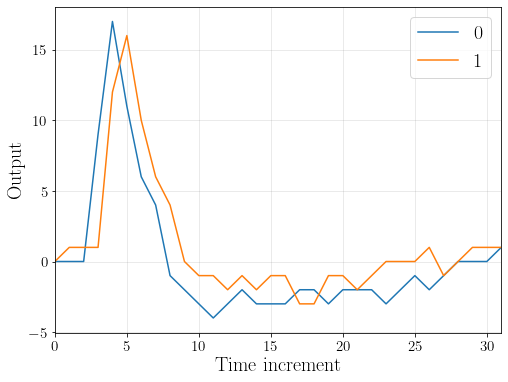

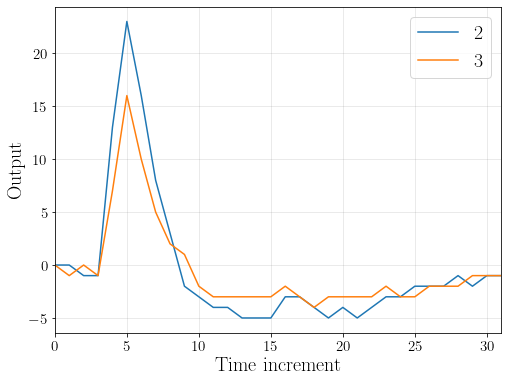

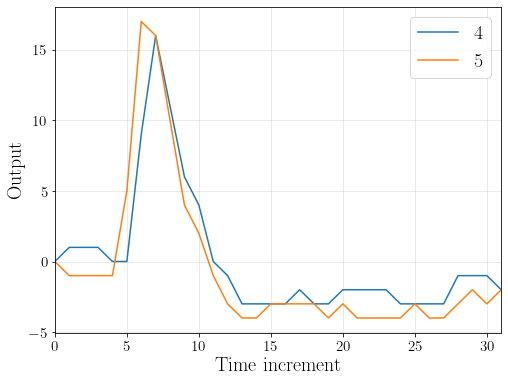

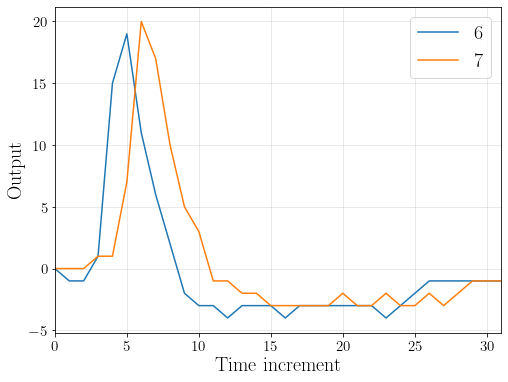

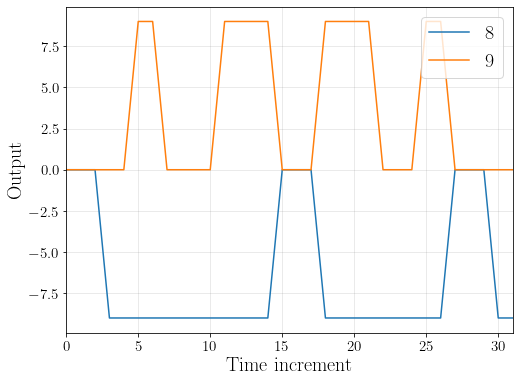

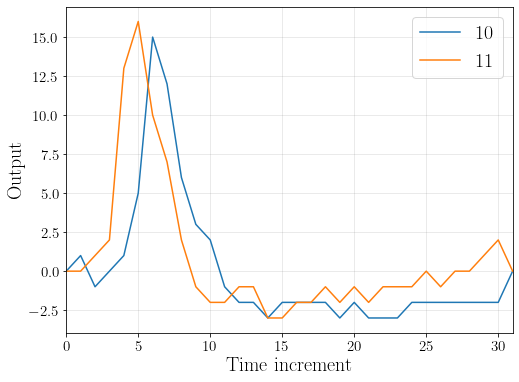

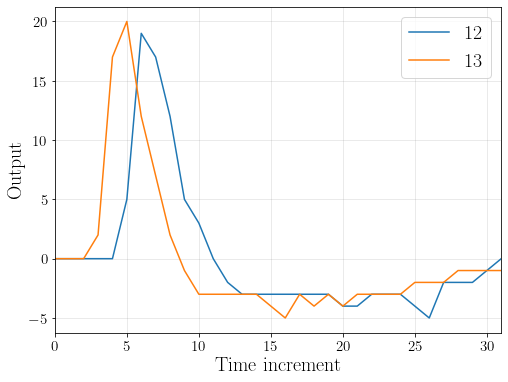

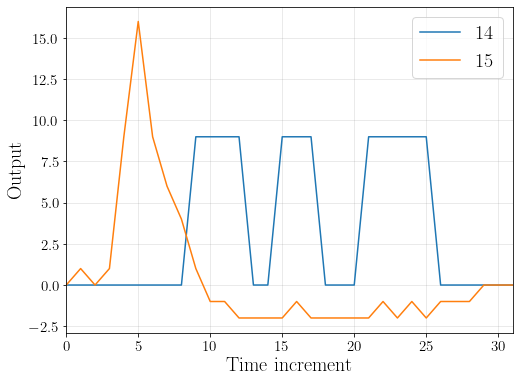

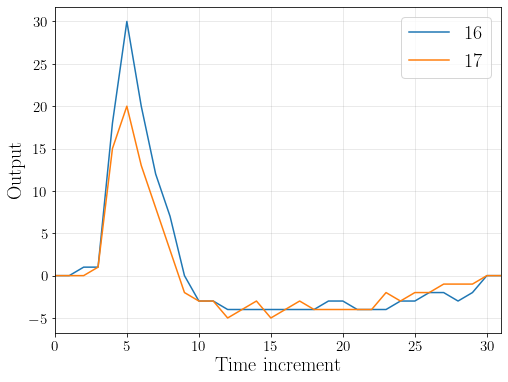

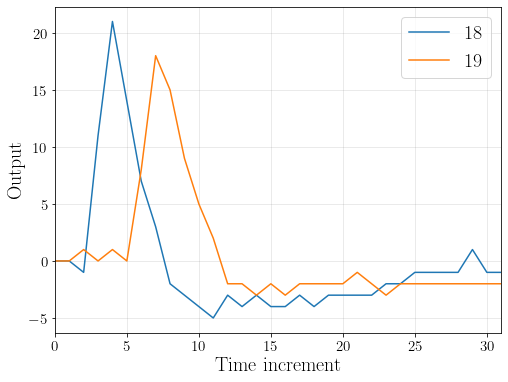

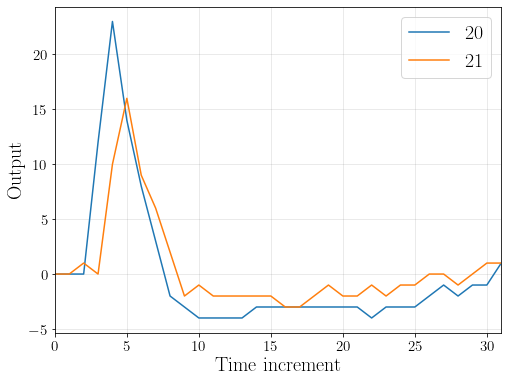

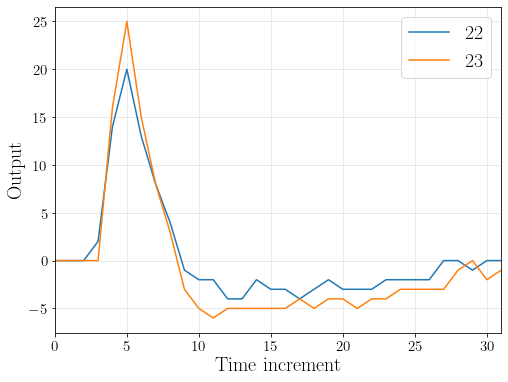

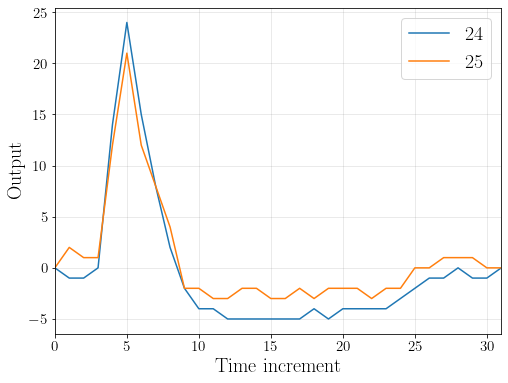

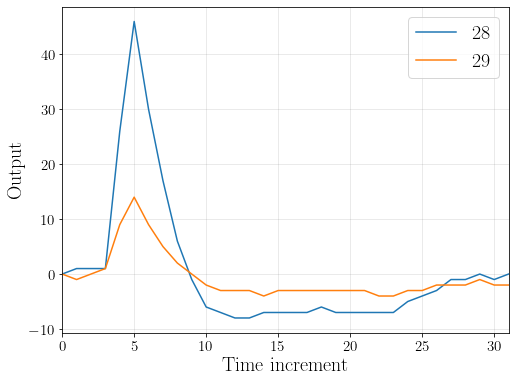

In [28]:
step = 2

for i in range(len(dataframe_signal)):
    if (i%step)==0:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    samples_plot = dataframe_signal.iloc[i]
    lp.plot_event(
        samples_plot[defs.list_samples_columns] - samples_plot['pedestal'], 
        ax=ax,
        label=str(i)
    )
    ax.legend()

Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0648_eta_None_layer_None/samples_iloc_67.png
Fig saved in /home/anthony/3A_CS/projet_ATLAS//output//images/run_00405127_num_0648_eta_None_layer_None/samples_iloc_67.pdf


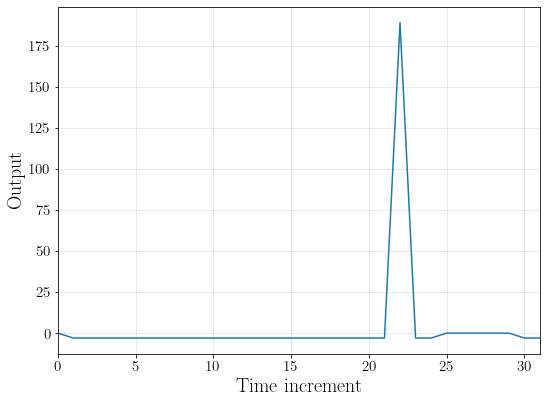

In [48]:
samples_plot = dataframe_signal.iloc[67]
fig, ax = lp.plot_event(
    samples_plot[defs.list_samples_columns] - samples_plot['pedestal'], 
)

lp.save_fig(fig, path=path, name="samples_iloc_67")

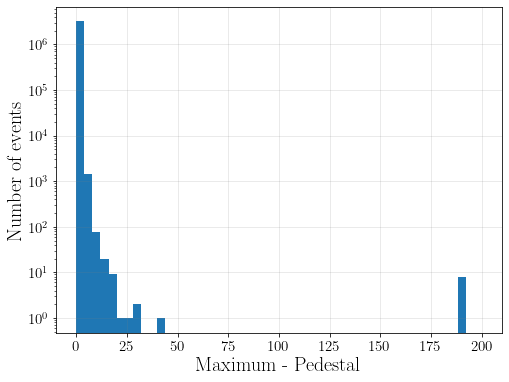

In [39]:
df_signal = dataframe.query("abs(mean - pedestal) < 5")

fig, _ = lp.plot_hist(
    df_signal['max'] - df_signal['pedestal'], 'Maximum - Pedestal', logscale=True,
    min_max=[0, 200]
)

In [40]:
df_signal = dataframe.query("(max - pedestal > 175) and (max - pedestal < 200)")
df_signal = df_signal.query("abs(mean - pedestal) < 5")

In [41]:
df_signal

channelId  layer     eta       phi  ieta  iphi  region     s0     s1  \
18797    997326336      2  2.2375 -2.409372    32    39       1  783.0  783.0   
220397   997326336      2  2.2375 -2.409372    32    39       1  783.0  783.0   
516077   997326336      2  2.2375 -2.409372    32    39       1  783.0  783.0   
1927277  997326336      2  2.2375 -2.409372    32    39       1  783.0  783.0   
2411117  997326336      2  2.2375 -2.409372    32    39       1  783.0  780.0   
2532077  997326336      2  2.2375 -2.409372    32    39       1  783.0  783.0   
2653037  997326336      2  2.2375 -2.409372    32    39       1  783.0  780.0   
2787437  997326336      2  2.2375 -2.409372    32    39       1  783.0  780.0   

            s2  ...    s30    s31  pedestal       mean        std    max  \
18797    780.0  ...  780.0  780.0     783.0  786.75000  33.296959  972.0   
220397   780.0  ...  780.0  780.0     783.0  786.18750  33.380793  972.0   
516077   780.0  ...  780.0  780.0     783.0  786.75000  33.296959  972.0   
1927277  780.0  ...  783.0  780.0     783.0  786.84375  33.282042  972.0   
2411117  780.0  ...  780.0  783.0     783.0  786.37500  33.353926  972.0   
2532077  783.0  ...  780.0  780.0     783.0  786.75000  33.296959  972.0   
2653037  780.0  ...  783.0  783.0     783.0  787.59375  33.152922  972.0   
2787437  780.0  ...  780.0  783.0     783.0  786.84375  33.282042  972.0   

           min  pos_max  pos_min  median  
18797    780.0       26        2   780.0  
220397   780.0       24        2   780.0  
516077   780.0       20        2   780.0  
1927277  780.0       19        2   780.0  
2411117  780.0        8        1   780.0  
2532077  780.0       11        5   780.0  
2653037  780.0       12        1   783.0  
2787437  780.0       27        1   780.0  

[8 rows x 47 columns]

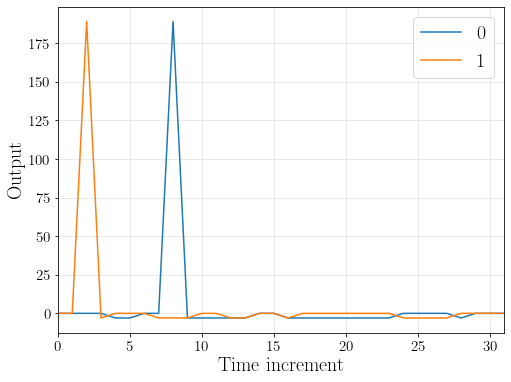

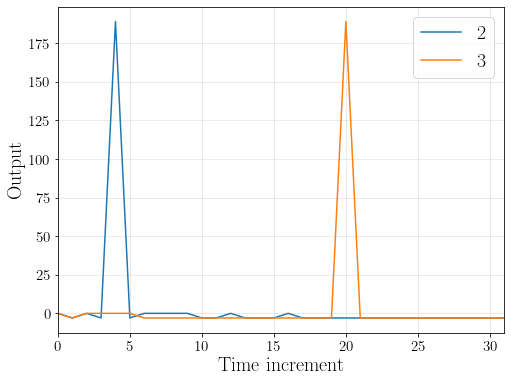

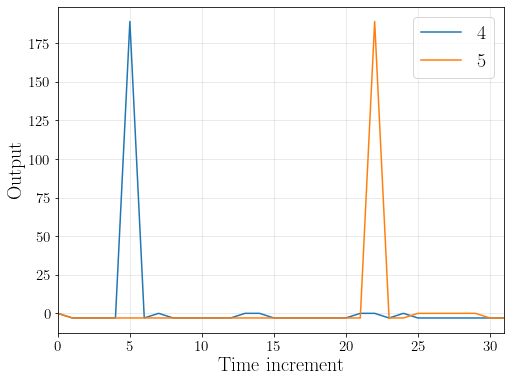

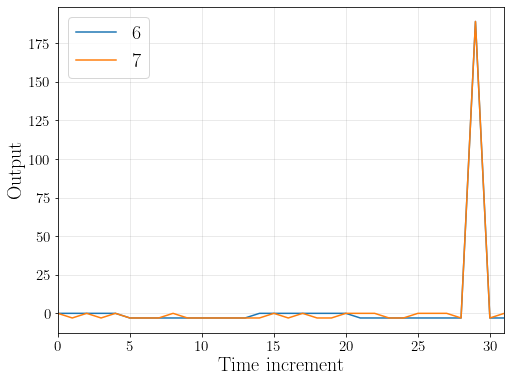

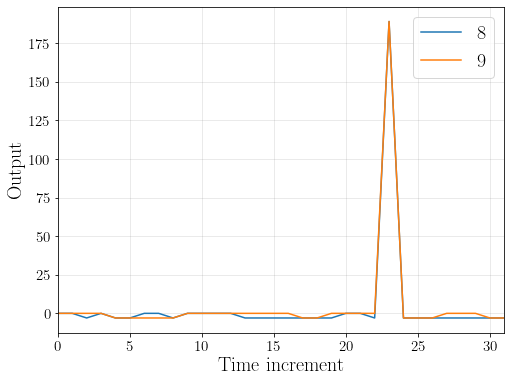

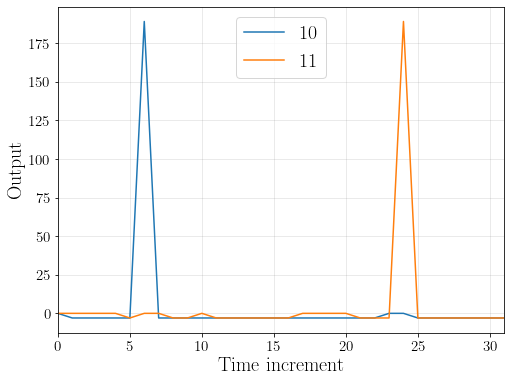

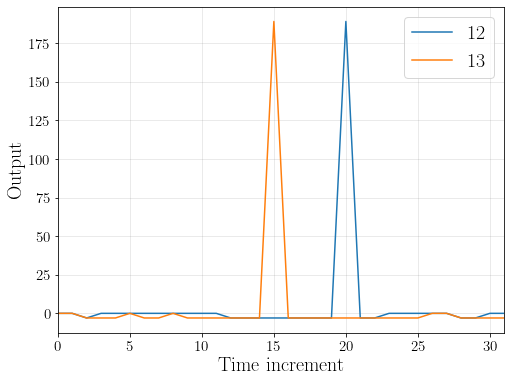

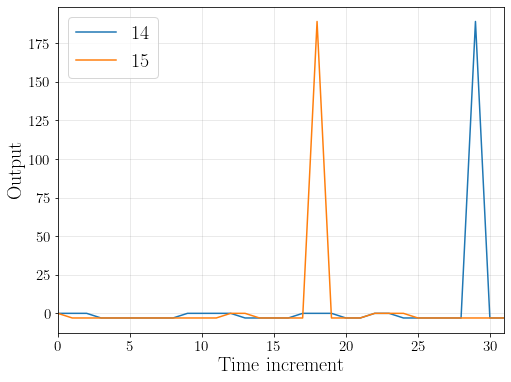

In [31]:
step = 2

for i in range(len(df_signal)):
    if (i%step)==0:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    samples_plot = df_signal.iloc[i]
    lp.plot_event(
        samples_plot[defs.list_samples_columns] - samples_plot['pedestal'], 
        ax=ax,
        label=str(i)
    )
    ax.legend()